In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

import post_patch as pp #post patch script
#post_patch_column = 'postPatch_label'
#post_patch_pipette_column = 'endPipetteR_label'

#sns.set_style('whitegrid') #Makes a white backround with gray horizontal gridmarks at y-values
sns.set_context('notebook')

In [2]:
def get_shiny_df():
    shiny_human_df = pd.read_csv('C:/users/kumar/documents/github/personal-projects/csv/shiny_human.csv')
    shiny_mouse_df = pd.read_csv('C:/users/kumar/documents/github/personal-projects/csv/shiny_mouse.csv')
    #shiny_human_df = pd.read_csv('C:/users/ramr/documents/github/coding/personal-projects/csv/shiny_human.csv')
    #shiny_mouse_df = pd.read_csv('C:/users/ramr/documents/github/coding/personal-projects/csv/shiny_mouse.csv')
    frames = (shiny_human_df, shiny_mouse_df)
    shiny_df = pd.concat(frames)
    shiny_df = shiny_df.loc[:,['sample_id', 'res_index_label', 'cluster_label']]
    return shiny_df

In [3]:
def get_json_df():
    json_df = pd.read_csv('C:/users/kumar/documents/github/personal-projects/csv/json_metadata.csv')
    #json_df = pd.read_csv('C:/users/ramr/documents/github/coding/personal-projects/csv/json_metadata.csv')
    json_df = json_df[json_df['status'] == 'SUCCESS']

    #Creates patch_duration column and outputs in minutes
    json_df['patch_duration'] = pd.to_datetime(json_df['extraction.timeRetractionEnd']) - pd.to_datetime(json_df['recording.timeWholeCellStart'])
    json_df['patch_duration'] = (json_df['patch_duration'].astype('timedelta64[s]'))/60

    json_df['date'] = json_df['date'].str[:10] #Strip away the time
    json_df['date'] = pd.to_datetime(json_df['date']) #Converting to YYYY-MM-DD

    json_df = pp.postpatch_reclass(json_df) #Makes post patch column with the script

    json_df.dropna(subset = ['patch_container'], inplace = True)
    json_df = json_df[json_df['patch_container'].str.match('PA')]

    json_df = json_df[['date',                   
                       'patch_container',
                       'roi_major',
                       'roi_minor',
                       'cell_depth',
                       'extraction.pressureApplied',
                       'patch_duration',
                       'post_patch']]
    return json_df

In [4]:
def merge_dfs(df1, df2):
    merged_df = pd.merge(left = df1, 
                         right = df2, 
                         left_on = 'patch_container',
                         right_on = 'sample_id',
                         how = 'inner')
    merged_df.drop(columns = ['sample_id'], inplace = True)
    merged_df.sort_index(inplace = True)
    return merged_df

In [5]:
#Making global variables
json_df = get_json_df()
shiny_df = get_shiny_df()
merged_df = merge_dfs(json_df, shiny_df)

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=Fa

In [6]:
merged_df.head()

,date,patch_container,roi_major,roi_minor,cell_depth,extraction.pressureApplied,patch_duration,post_patch,res_index_label,cluster_label
0,2017-10-03,PAS4_171003_451_A01,VISp,layer 5,36.6,-34.0,14.483333,Nuc-high seal,0.548225,n60
1,2017-10-03,PAS4_171003_451_A01,VISp,layer 5,36.6,-34.0,14.483333,Nuc-low seal,0.548225,n60
2,2017-10-03,PAS4_171003_452_A01,VISp,layer 2/3,36.3,-32.0,12.500000,Nuc-high seal,1.000000,Pvalb Tpbg
3,2017-10-03,PAS4_171003_452_A01,VISp,layer 2/3,36.3,-32.0,12.500000,Nuc-low seal,1.000000,Pvalb Tpbg
4,2017-10-04,PAS4_171004_452_A01,VISp,layer 5,39.1,-40.0,9.633333,Nuc-high seal,1.000000,Sst Chodl


In [7]:
merged_df.tail()

,date,patch_container,roi_major,roi_minor,cell_depth,extraction.pressureApplied,patch_duration,post_patch,res_index_label,cluster_label
446,2018-01-15,PAS4_180115_454_A01,VISp,layer 4,31.7,-25.0,8.466667,Entire cell,0.868238,n107
447,2018-02-20,PAS4_180220_451_A01,VISp,layer 2/3,51.1,-40.0,8.633333,Entire cell,1.000000,Sst Hpse Cbln4
448,2018-02-26,PAS4_180226_451_A01,VISp,layer 2/3,42.4,-31.0,9.466667,Entire cell,0.694952,n15
449,2018-03-27,PAS4_180327_451_A01,VISp,layer 2/3,40.0,-20.0,10.116667,Entire cell,0.732810,n66
450,2018-05-31,PAS4_180531_454_A01,VISp,layer 2/3,41.9,-21.0,15.266667,Entire cell,1.000000,Vip Pygm C1ql1


In [8]:
#Outputing dataframe as excel sheet
#writer = pd.ExcelWriter('TITLE.xlsx')
#dataframe.to_excel(writer, 'Sheet#)

writer = pd.ExcelWriter('my_dataframe.xlsx')
merged_df.to_excel(writer, 'Sheet1')
writer.save()

### Plots

In [9]:
json_df['post_patch'].value_counts()

Nuc-high seal    306
Nuc-low seal     306
No-low seal       84
No-high seal      33
Entire cell       13
Name: post_patch, dtype: int64

In [10]:
def pie_plot(df):
    '''Another roundabout method for pivot table(inefficient)
    df1 = df.loc[:,['post_patch', 'res_index_label']]
    df1 = df1.groupby('post_patch').count()
    df1 = df1.rename(columns = {'res_index_label' : 'count'})
    df1 = df1.pivot_table(values=['count'], index=['post_patch'], aggfunc='sum')'''
    
    df1 = df.groupby(['post_patch']).size().reset_index(name = 'count')
    df1.set_index('post_patch', inplace = True)
    
    explode = (0.05, 0.05, 0.05, 0.05, 0.05) #splits the categories
    df1.plot.pie(y = 'count', autopct='%1.1f%%', figsize = (8,8), shadow = True, legend = False, 
                 explode = explode, colors = ['#f7fcb9','#fc9272', '#de2d26', '#31a354', '#a1d99b'])
    #Entire(Yellow), No-high(Light Red), No-low(Red), Nuc-high(Green), Nuc-low(Light Green)
    
    plt.title('Post Patch Percentage', loc = 'center', fontsize = 14)
    plt.axes().set_ylabel('')

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


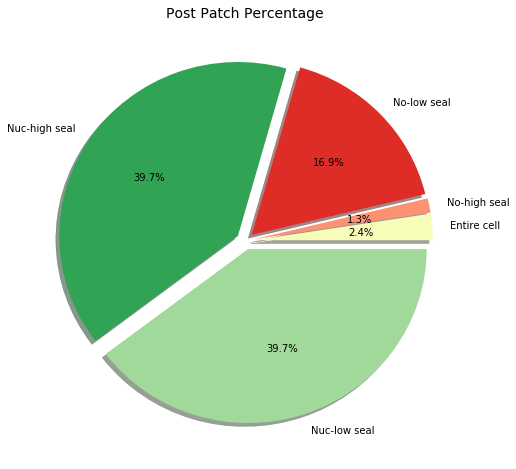

In [11]:
pie_plot(merged_df)